<a href="https://colab.research.google.com/github/shirshabose/D2MSA-Net/blob/main/C%C3%B3pia_de_GaussianSplating.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
---
This guide is separated in 3 steps:
- Part 1 - Getting the images
- Part 2 - Training the model
- Part 3 - Viewing the Gaussian Splating

But you don't need to follow them in order, for example if you don't want to use your own images we have a set prepared for you to train the model in Part 2.

# Part 1 - Getting the images
---
## Part 1.1

First of all we need the images or video that has been captured of the object we wnat to reconstruct.

If you already got the images and not a video skip to [part 1.2](#scrollTo=gYkHVX0W1qSH) .

If you have a video first we need to get all the frames out of it, and we will do that with [VLC player](https://www.videolan.org/vlc/) that is free.

After downloading and installing it we need to activate the frame separation function.

To do that select 'Tools' > 'Preferences' .

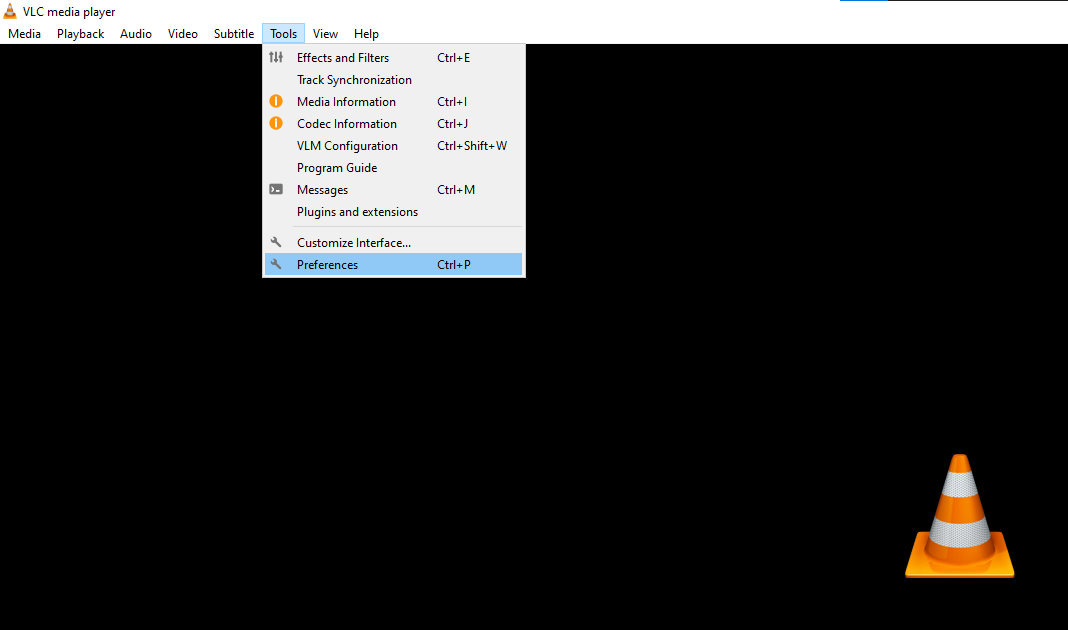

Select the '()All' in Show settings.

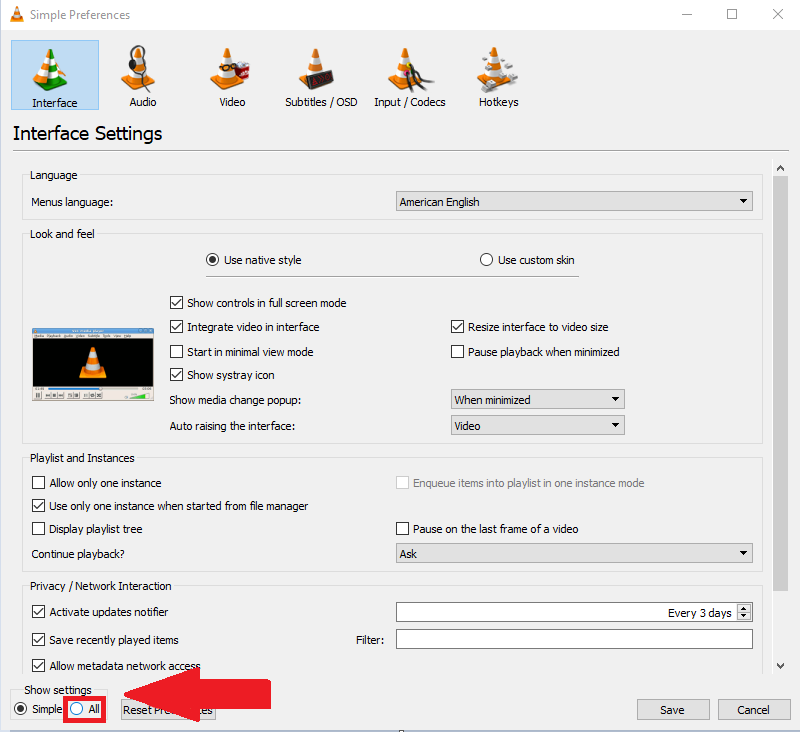

Now roll down to 'Video' and select 'Filters', then check the box for 'Scene video filter' .

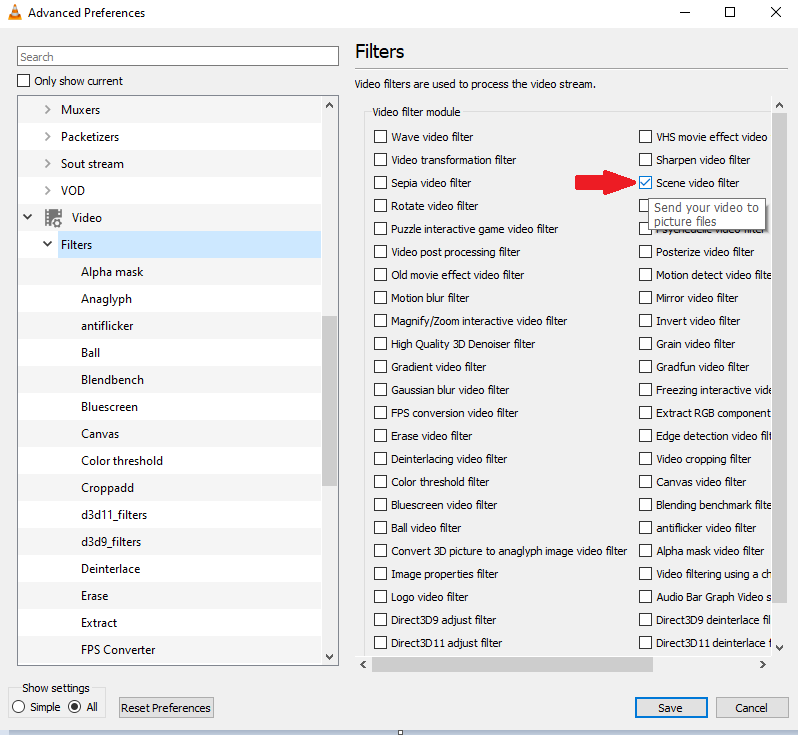

Then roll down again and select the 'Scene filter', inside this menu you need to do 2 things:
- Set a path to save the images, i recomend creating a folder called 'images' that you can put inside the myproject folder in the part 1.2 .
- Set the 'Recording ratio' to 1

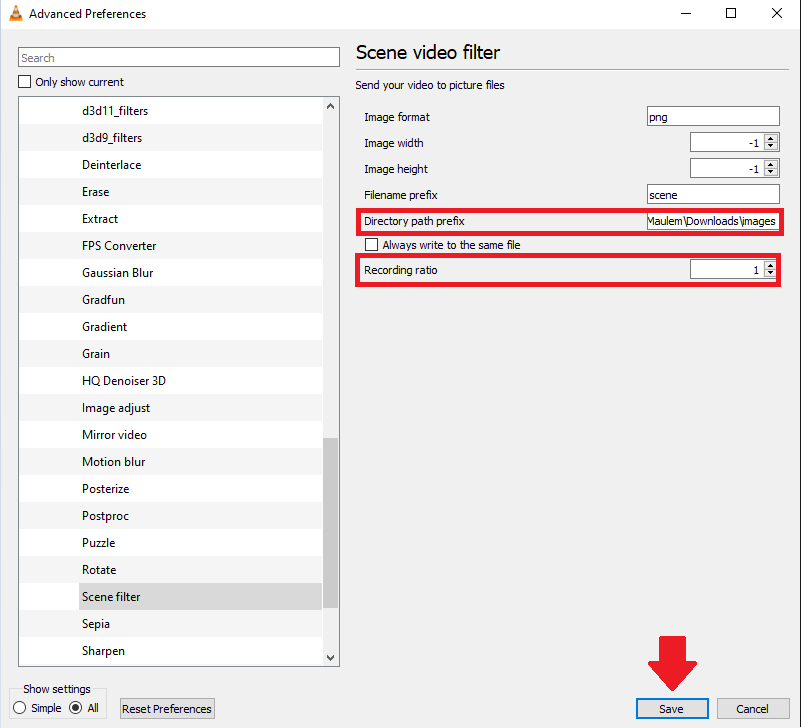

After that save the settings, close the program and open your video, for every frame that is played for you another copy is saved inside the folder that you set.

**Don't stop it and just close the player when the video ends!**

If you want to disable this frame saving setting for normal VLC use just disable again the 'Scene video filter' checkbox.

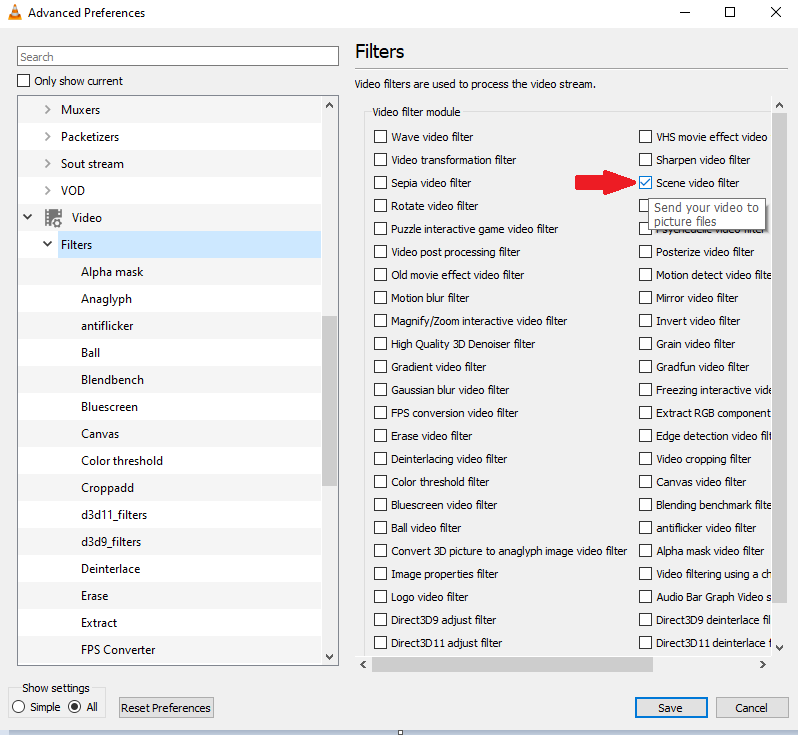

## Part 1.2
Now with the images ready we need to create a project folder and set the cameras and other configs to the gaussian splatting.

- Create a project folder with any name and then create another folder within named images, for this tutorial the project folder name will be myproject.

- Put all the images in myproject/images .

First you need to download a program called [Colmap](https://colmap.github.io/install.html), in this guide we will be using [windows version](https://github.com/colmap/colmap/releases) 3.8 .

After opening the program click in automatic reconstruction:

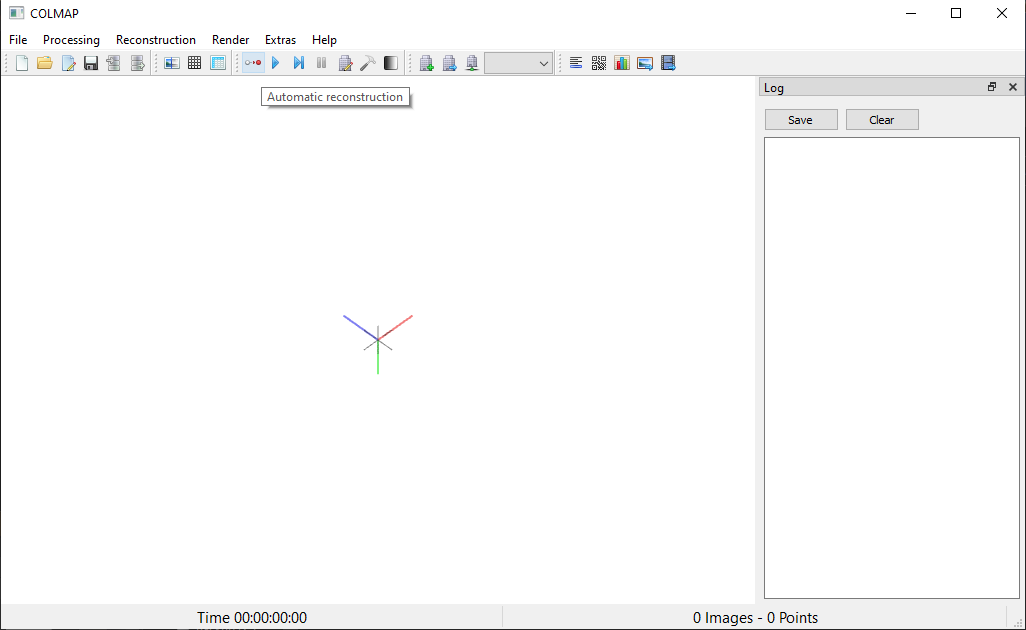

- Select the 'Workspace folder' as myproject.
- Select the 'Image folder' as myproject/images.
- If your images were derived from a video select 'Data type' as Video frames.
- Unselect 'Dense model' since we are not using it.
- Click 'Run'.


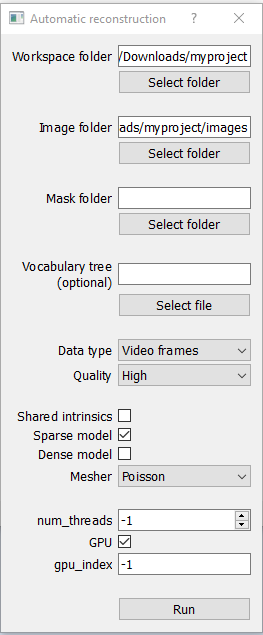

After a while it will end generating a 3D point view of the object that we filmed/photographed.


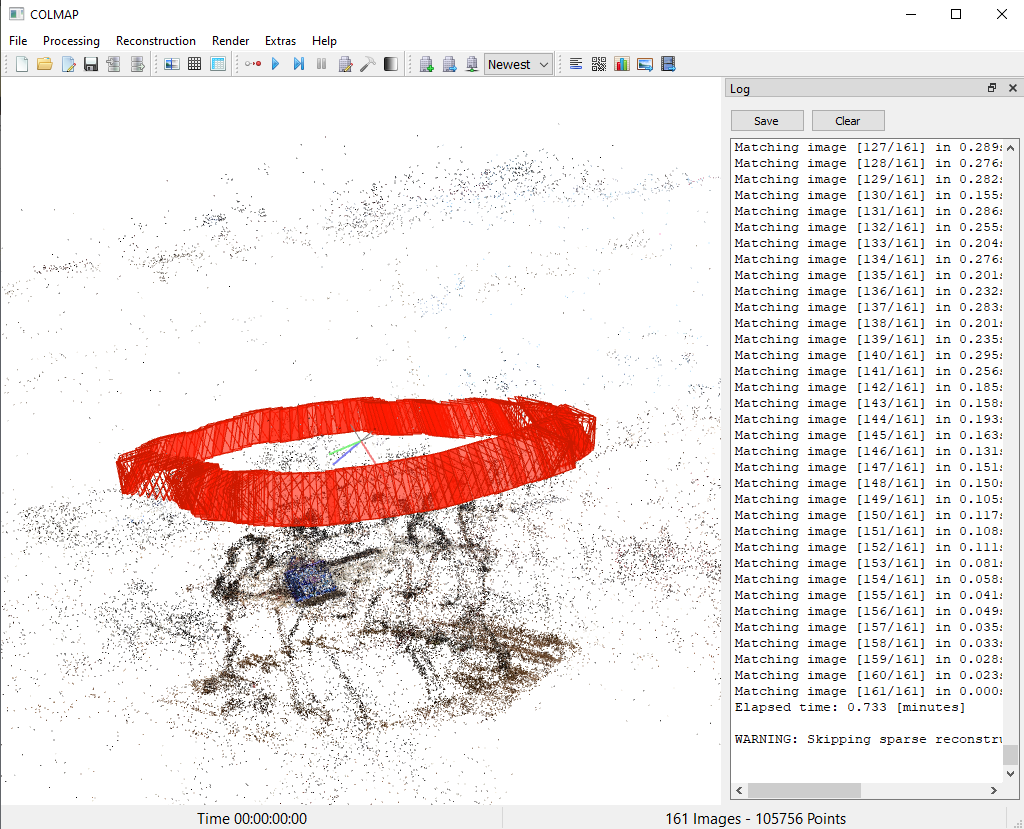

After that we need to change the cameras for the types that the gaussian splatting can read, that are pinhole or simple pinhole.

To do that:
- Go on 'File' > 'Open project' and select the file: myproject/sparse/0/project.ini .
- Then go on 'Processing' > 'Database management' .
- Open the 'Cameras' tab, you should see something like this with at least one camera:



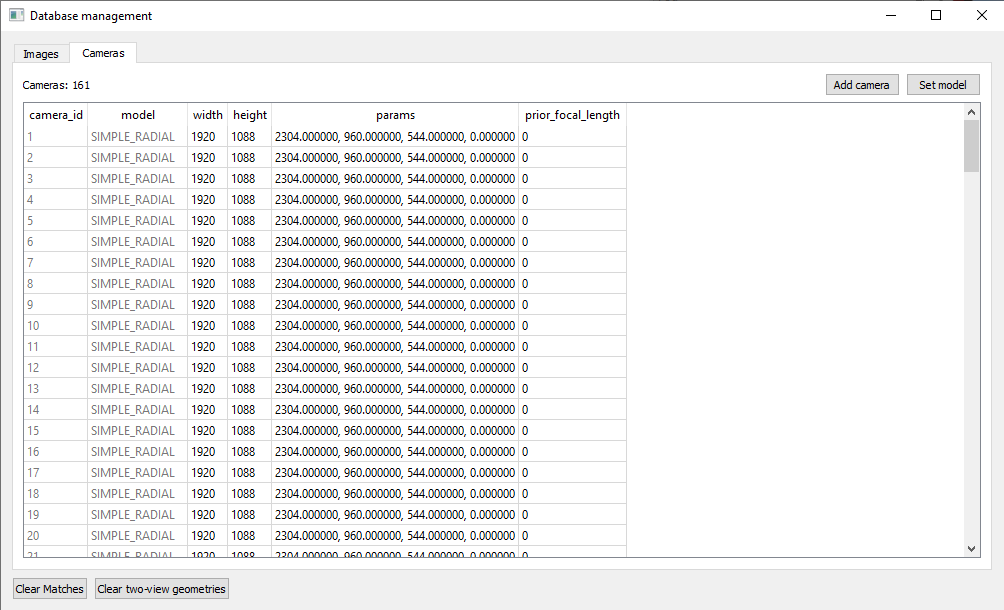

- Click 'ctrl a' to select all cameras, click on 'Set model' and select 'Pinhole' .
- Then you can close the Database management tab.
- Finally go on 'Reconstruction' > 'Start reconstruction' .

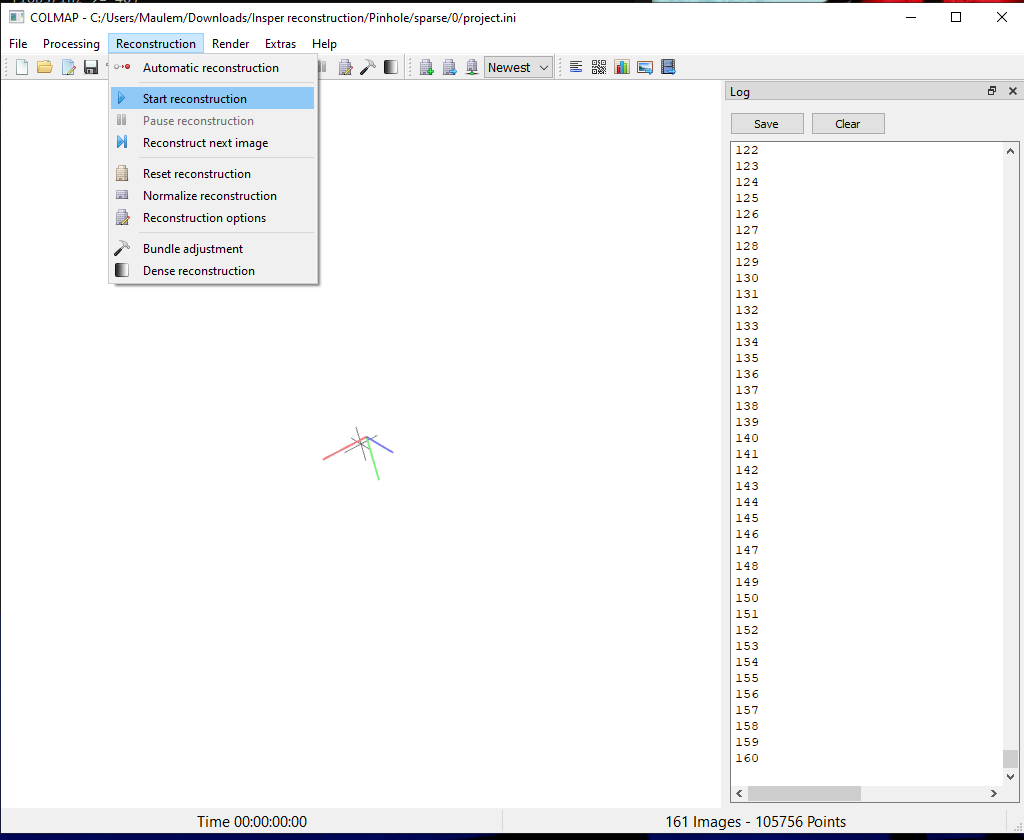

After reconstructing the scene we will now export the data so we can use on Google colab.

- Click 'File' > 'Export model' and select myproject folder, this will save 4 files that we will use later:
  - cameras.bin
  - images.bin
  - points3D.bin
  - project.ini

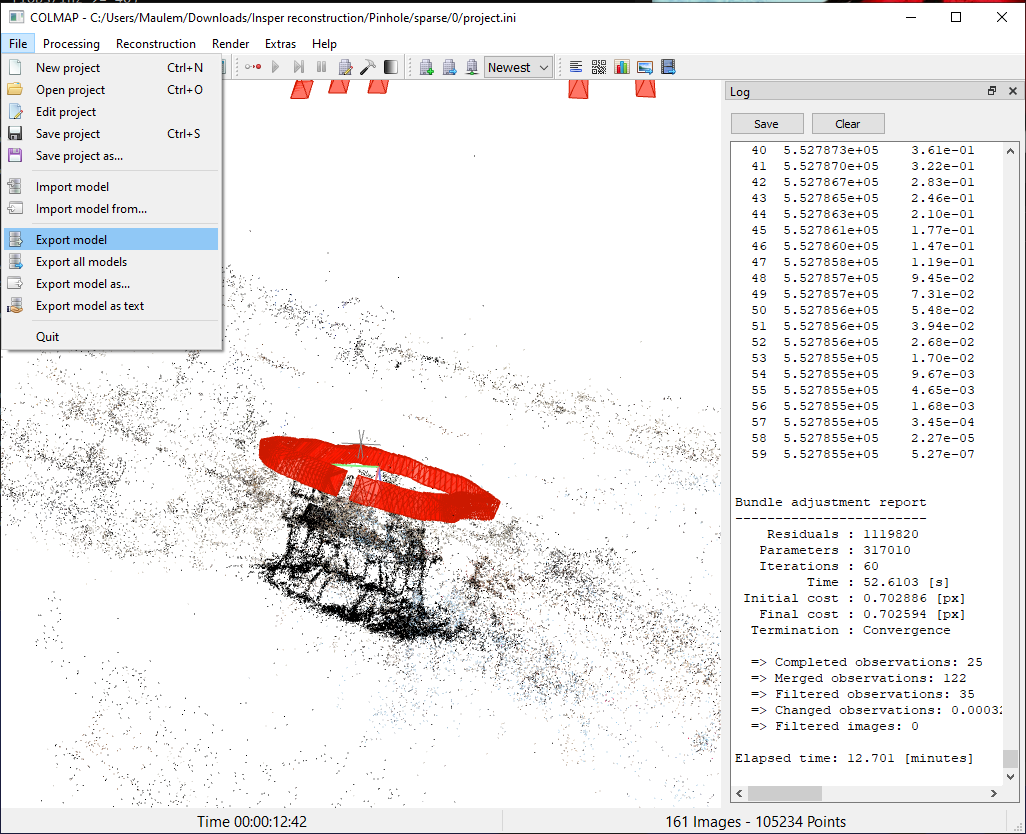

# Part 2 - Training the model
---

Now we need to download the files and testing data.

**Make sure that now that your runtime type is a T4 GPU, if not you won't be able to train the model.**

In [ ]:
%cd /content
!git clone --recursive https://github.com/camenduru/gaussian-splatting
!pip install -q plyfile

%cd /content/gaussian-splatting
!pip install -q https://huggingface.co/camenduru/gaussian-splatting/resolve/main/diff_gaussian_rasterization-0.0.0-cp310-cp310-linux_x86_64.whl
!pip install -q https://huggingface.co/camenduru/gaussian-splatting/resolve/main/simple_knn-0.0.0-cp310-cp310-linux_x86_64.whl

!wget https://huggingface.co/camenduru/gaussian-splatting/resolve/main/tandt_db.zip
!unzip tandt_db.zip

%cd /content
!mkdir myproject
!mkdir myproject/images
%cd /content/myproject
!mkdir sparse
!mkdir sparse/0

%cd /content/gaussian-splatting

/content
Cloning into 'gaussian-splatting'...
remote: Enumerating objects: 603, done.
remote: Total 603 (delta 0), reused 0 (delta 0), pack-reused 603
Receiving objects: 100% (603/603), 2.09 MiB | 5.85 MiB/s, done.
Resolving deltas: 100% (346/346), done.
Submodule 'SIBR_viewers' (https://gitlab.inria.fr/sibr/sibr_core) registered for path 'SIBR_viewers'
Submodule 'submodules/diff-gaussian-rasterization' (https://github.com/graphdeco-inria/diff-gaussian-rasterization) registered for path 'submodules/diff-gaussian-rasterization'
Submodule 'submodules/simple-knn' (https://gitlab.inria.fr/bkerbl/simple-knn.git) registered for path 'submodules/simple-knn'
Cloning into '/content/gaussian-splatting/SIBR_viewers'...
remote: Enumerating objects: 2879, done.        
remote: Counting objects: 100% (1412/1412), done.        
remote: Compressing objects: 100% (712/712), done.        
remote: Total 2879 (delta 865), reused 1120 (delta 694), pack-reused 1467        
Receiving objects: 100% (2879/2879

If you don't want to train the model with your own images run the cell below, if not just skip this cell.

In [ ]:
!python train.py -s /content/gaussian-splatting/tandt/truck

To train your own images first we need to upload them to this environment.

- First of all make sure that in the colab files is there a folder called 'myproject', if not then click in the refresh button like below.

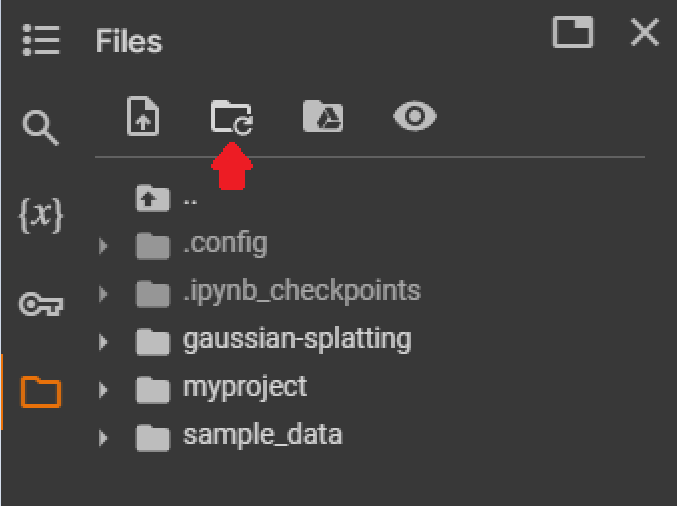

- Second add the 4 files exported before in the 'myproject' folder on your computer to the colab myproject/sparse/0 folder.

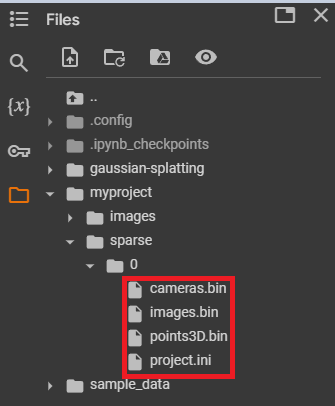

- Finally select all the images in your computer's 'myproject/images' and upload they to the colab's 'myproject/images'.

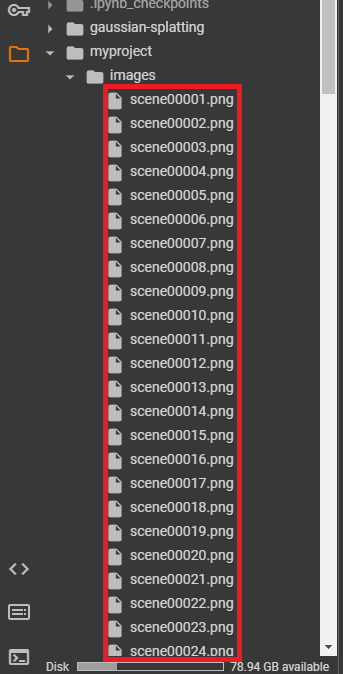

Now if you did every step right when you play the next code cell you should see it start training and now you will need to await about 1h to the training complete.

**We recomend to leave this tab open and selected, because if the google thinks that you're being inactive it will
 disconnect you.**

When you play the next code cell if the training begin correctly you should see something like this, if it just stops without training it means that there's a problem with your images or with your exported files and we recomend you to start Step 1 again.

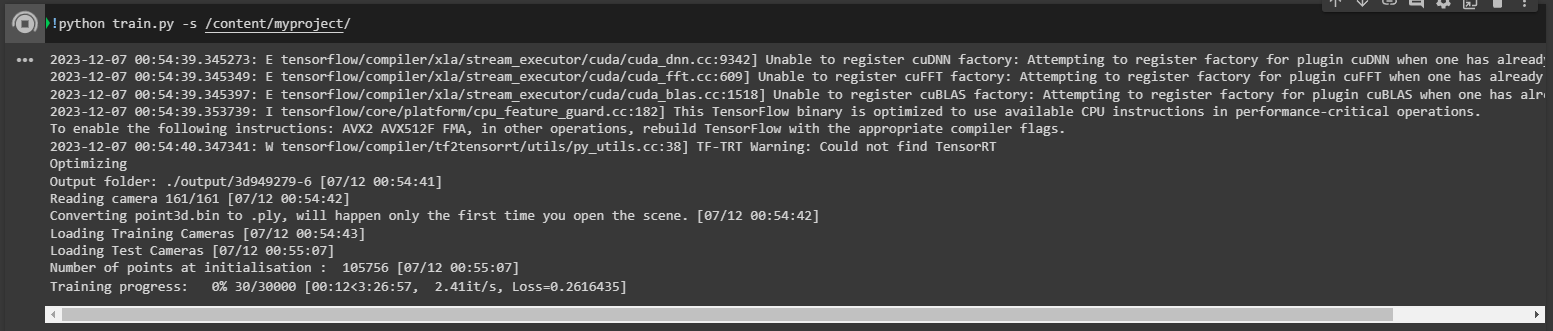

In [ ]:
!python train.py -s /content/myproject/

2023-12-07 01:44:56.249573: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-07 01:44:56.249633: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-07 01:44:56.249672: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-07 01:44:56.257301: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-07 01:44:57.218479: W tensorflow/compiler/

If the training was sucessfull all we need to do now is download the point_cloud.ply to our computer, it is located in 'gaussian-splating/output/######/point_cloud/iteration_30000/point_cloud.ply'

After you click download you will need to wait until all the download circle is complete to save the file in your computer.

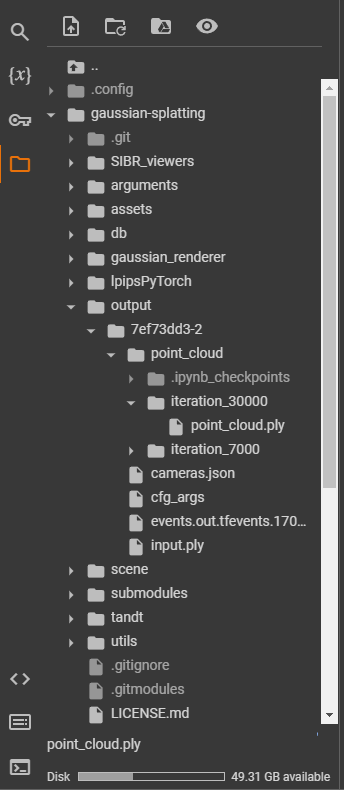

# Part 3 - Viewing the Gaussian Splating
---

If you did the Part 2 you should have a point_cloud.ply file, if not after you run this server you won'be be able to render anything else than the 3D train.

Run the cell below to create a cloudflare website to view 3D gaussian splatting models.

In [ ]:
%cd /content
!git clone https://github.com/camenduru/splat
!wget https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64.deb -O /content/cloudflared-linux-amd64.deb
!dpkg -i cloudflared-linux-amd64.deb

import atexit, requests, subprocess, time, re, os
from random import randint
from threading import Timer
from queue import Queue
def cloudflared(port, metrics_port, output_queue):
    atexit.register(lambda p: p.terminate(), subprocess.Popen(['cloudflared', 'tunnel', '--url', f'http://127.0.0.1:{port}', '--metrics', f'127.0.0.1:{metrics_port}'], stdout=subprocess.DEVNULL, stderr=subprocess.STDOUT))
    attempts, tunnel_url = 0, None
    while attempts < 10 and not tunnel_url:
        attempts += 1
        time.sleep(3)
        try:
            tunnel_url = re.search("(?P<url>https?:\/\/[^\s]+.trycloudflare.com)", requests.get(f'http://127.0.0.1:{metrics_port}/metrics').text).group("url")
        except:
            pass
    if not tunnel_url:
        raise Exception("Can't connect to Cloudflare Edge")
    output_queue.put(tunnel_url)
output_queue, metrics_port = Queue(), randint(8100, 9000)
thread = Timer(2, cloudflared, args=(7860, metrics_port, output_queue))
thread.start()
thread.join()
tunnel_url = output_queue.get()
os.environ['webui_url'] = tunnel_url
%cd /content/splat

Cloning into 'splat'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 27 (delta 4), reused 3 (delta 3), pack-reused 19
Receiving objects: 100% (27/27), 20.22 KiB | 460.00 KiB/s, done.
Resolving deltas: 100% (8/8), done.
--2023-12-07 01:36:06--  https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64.deb
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/cloudflare/cloudflared/releases/download/2023.10.0/cloudflared-linux-amd64.deb [following]
--2023-12-07 01:36:06--  https://github.com/cloudflare/cloudflared/releases/download/2023.10.0/cloudflared-linux-amd64.deb
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://objects.githubusercontent.com/gi

Now run the cell below to start the server and click the first link to open the renderer in a new tab.

In [ ]:
print(tunnel_url)

!python -m http.server 7860

https://broker-goes-building-communication.trycloudflare.com
Serving HTTP on 0.0.0.0 port 7860 (http://0.0.0.0:7860/) ...
127.0.0.1 - - [12/Dec/2023 02:31:33] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [12/Dec/2023 02:31:33] "GET /main.js HTTP/1.1" 200 -
127.0.0.1 - - [12/Dec/2023 02:31:34] code 404, message File not found
127.0.0.1 - - [12/Dec/2023 02:31:34] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [12/Dec/2023 02:31:35] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [12/Dec/2023 02:31:35] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [12/Dec/2023 02:31:35] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [12/Dec/2023 02:31:35] "GET /main.js HTTP/1.1" 200 -
127.0.0.1 - - [12/Dec/2023 02:31:35] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [12/Dec/2023 02:31:35] "GET /main.js HTTP/1.1" 200 -
127.0.0.1 - - [12/Dec/2023 02:31:36] code 404, message File not found
127.0.0.1 - - [12/Dec/2023 02:31:36] "GET /favicon.ico HTTP/1.1" 404 -


When you get tired of seeing the 3D train model and if you did the Part 2 you can drag and drop your 'point_cloud.ply' file in the tab to render your own 3D, also it will offer you to download the model.splat that you can use in other applications if you want, if not just click cancel.

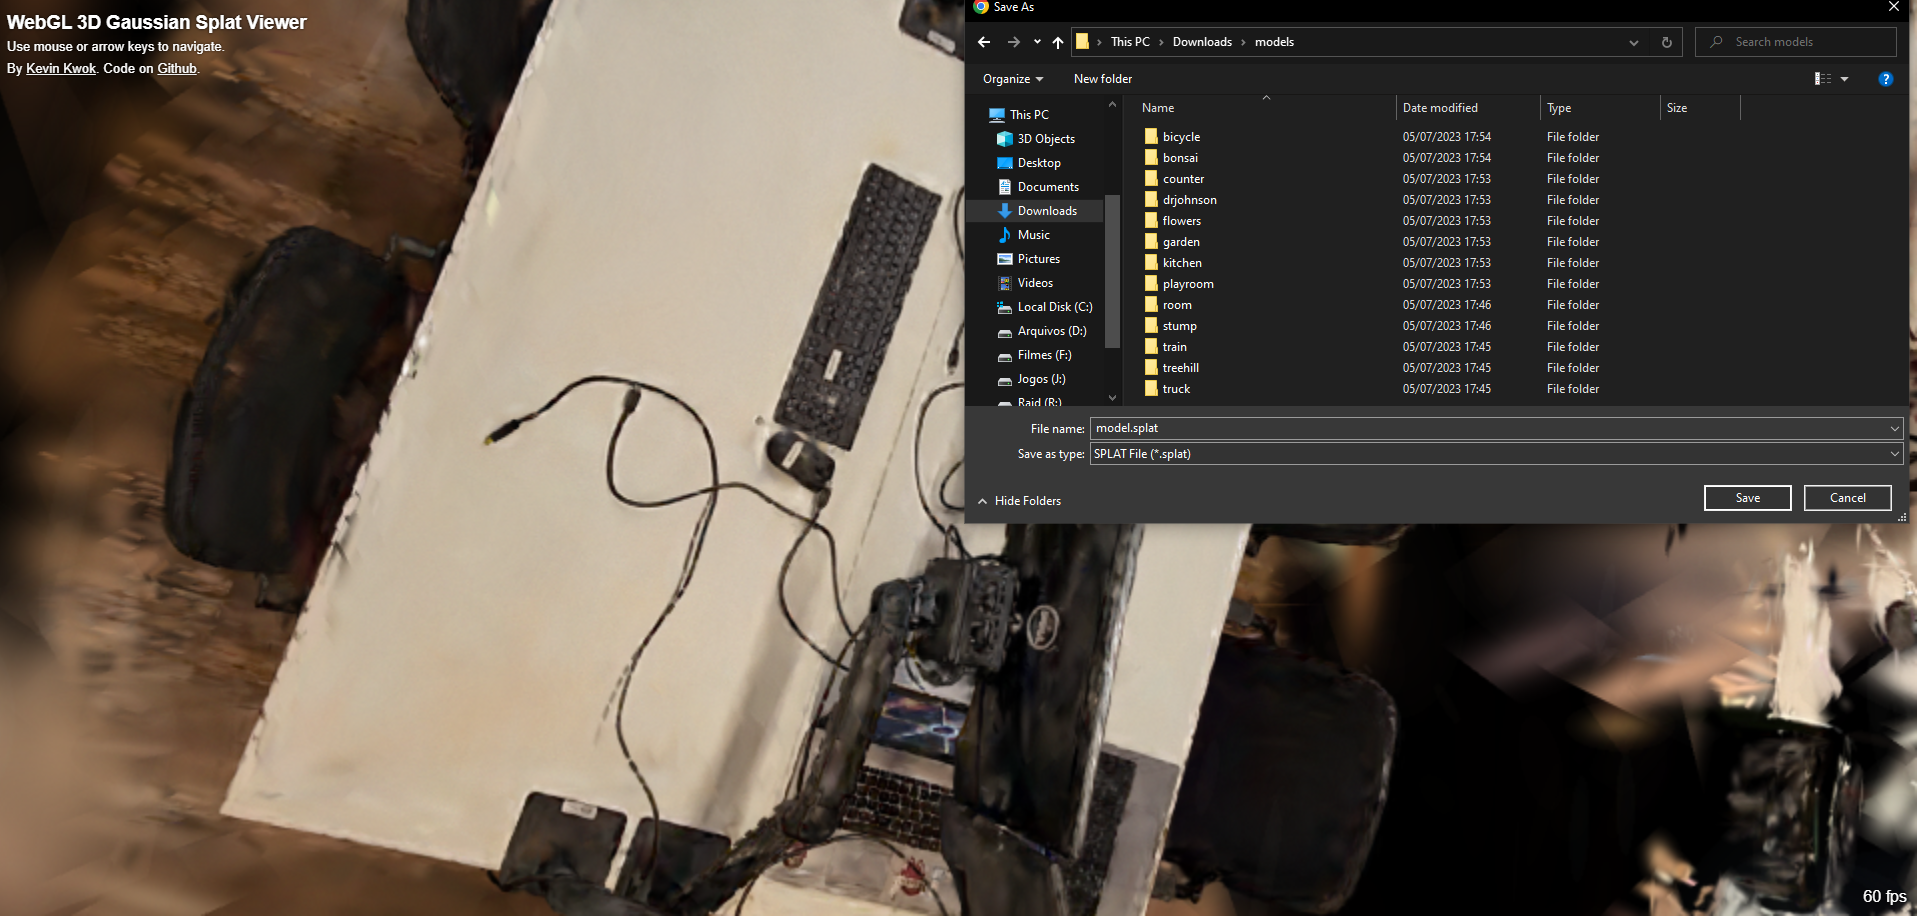